In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

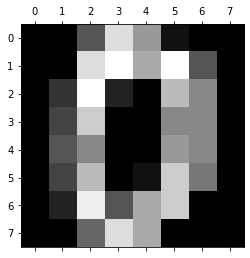

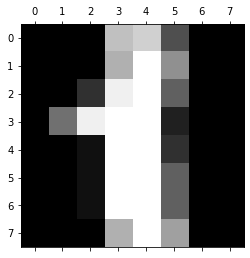

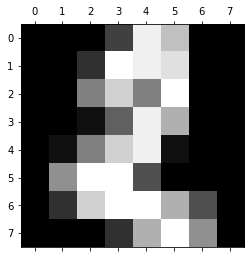

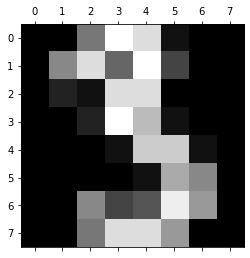

In [8]:
plt.gray()
for i in range(4):
    plt.matshow(data.images[i])
plt.show()

In [9]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df["target"] = data.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1), df.target, test_size = 0.2)

In [13]:
len(X_test)

360

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
model.score(X_test, y_test)*100

98.05555555555556

# using different parameters

In [18]:
model2 = RandomForestClassifier(n_estimators = 20)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)*100

96.94444444444444

In [45]:
model3 = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
model3.fit(X_train, y_train)
model3.score(X_test, y_test)*100

98.33333333333333

# Metrics

In [46]:
from sklearn import metrics

In [48]:
cm = metrics.confusion_matrix(y_test, model.predict(X_test))
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 36,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 28]], dtype=int64)

In [49]:
import seaborn as sns

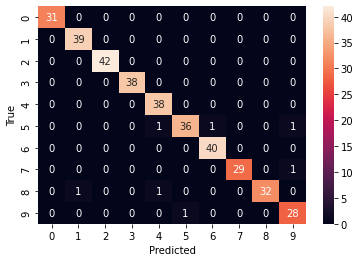

In [53]:
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [55]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        38
           4       0.95      1.00      0.97        38
           5       0.97      0.92      0.95        39
           6       0.98      1.00      0.99        40
           7       1.00      0.97      0.98        30
           8       1.00      0.94      0.97        34
           9       0.93      0.97      0.95        29

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Exercise

In [56]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [58]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris["target"] = iris.target
df_iris["species"] = df_iris["target"].apply(lambda x: iris.target_names[x])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [59]:
X = df_iris.drop(["target", "species"], axis=1)
y = df_iris.target

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
model.score(X_test, y_test)*100

96.66666666666667

In [64]:
# Different parameters

In [75]:
model2 = RandomForestClassifier(n_estimators=40)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)*100

100.0